In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training_data = pd.read_excel('predict_house_price_training_data.xlsx')

In [3]:
target_variable_name = 'Оценка риелтора'
training_target_variable = training_data[target_variable_name]
training_target_variable

0         8
1         7
2         7
3         8
4         9
         ..
15124    11
15125     6
15126     8
15127     8
15128     7
Name: Оценка риелтора, Length: 15129, dtype: int64

In [5]:
training_samples = training_data.drop(target_variable_name, axis=1)
training_samples.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,830000,5,3.50,3490,21780,2.0,0,0,3,3490,0,1996,0,47.6707,-122.144
1,385000,4,1.75,2360,7620,1.0,0,0,4,1180,1180,1955,0,47.5278,-122.345
2,610000,6,2.75,2040,8560,1.0,0,2,4,1100,940,1961,0,47.6160,-122.115
3,550000,3,1.75,1940,8376,1.0,0,0,4,1290,650,1963,0,47.5586,-122.173
4,1300000,3,2.75,3450,5350,1.5,0,3,4,2590,860,1925,0,47.6389,-122.407


In [7]:
from sklearn import linear_model, ensemble

linear_regression_model = linear_model.LinearRegression()
random_forest_model = ensemble.RandomForestRegressor()

In [8]:
linear_regression_model.fit(training_samples, training_target_variable)

LinearRegression()

In [9]:
random_forest_model.fit(training_samples, training_target_variable)

RandomForestRegressor()

In [15]:
test_data = pd.read_excel('predict_house_price_test_data.xlsx')
test_target_variable = test_data[target_variable_name]
print(test_target_variable)
test_samples = test_data.drop(target_variable_name, axis=1)
test_samples.head()

0        7
1       10
2        6
3        8
4        7
        ..
6479     9
6480     6
6481    10
6482     7
6483    10
Name: Оценка риелтора, Length: 6484, dtype: int64


,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,260000,3,1.00,1300,10139,1.0,0,0,3,1300,0,1962,2007,47.3427,-122.087
1,734500,4,2.75,3280,6845,2.0,0,0,3,3280,0,2003,0,47.7042,-122.107
2,325000,1,1.00,1220,12426,1.0,0,4,4,1220,0,1946,0,47.4047,-122.331
3,1990000,3,2.50,2880,13500,1.0,0,4,5,1520,1360,1950,0,47.6281,-122.216
4,315000,3,2.00,1300,3731,1.0,0,0,3,900,400,1993,0,47.5374,-122.270


In [11]:
test_predictions_linear = linear_regression_model.predict(test_samples)
test_predictions_random_forest = random_forest_model.predict(test_samples)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error_linear_model = mean_absolute_error(test_target_variable, test_predictions_linear)
mean_squared_error_linear_model = mean_squared_error(test_target_variable, test_predictions_linear)

mean_absolute_error_random_forest_model = mean_absolute_error(test_target_variable, test_predictions_random_forest)
mean_squared_error_random_forest_model = mean_squared_error(test_target_variable, test_predictions_random_forest)

import numpy as np

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели линейной регрессии".format(
        mean_absolute_error_linear_model,
        np.sqrt(mean_squared_error_linear_model)))

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели случайного леса".format(
       mean_absolute_error_random_forest_model,
       mean_squared_error_random_forest_model**(1/2)))

MAE:    0.49, RMSE:    0.64 для модели линейной регрессии
MAE:    0.39, RMSE:    0.53 для модели случайного леса


In [16]:
test_data.nsmallest(1, target_variable_name)

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
129,95000,2,1.0,960,7000,1.0,0,0,3,4,960,0,1918,0,47.3864,-122.307


In [17]:
test_data.nlargest(1, target_variable_name)

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
744,2890000,5,6.25,8670,64033,2.0,0,4,3,13,6120,2550,1965,2003,47.7295,-122.372


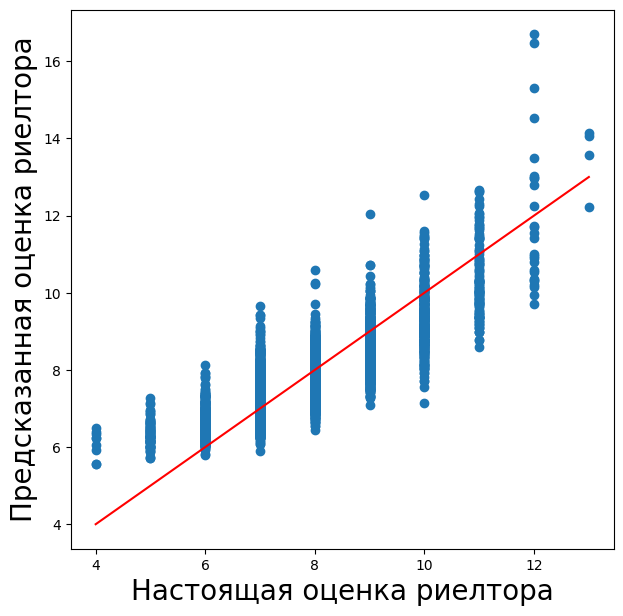

In [18]:
plt.figure(figsize=(7, 7))
plt.xlabel('Настоящая оценка риелтора', fontsize=20)
plt.ylabel('Предсказанная оценка риелтора', fontsize=20)
plt.scatter(test_target_variable, test_predictions_linear)
plt.plot([4, 13], [4, 13], 'r')##

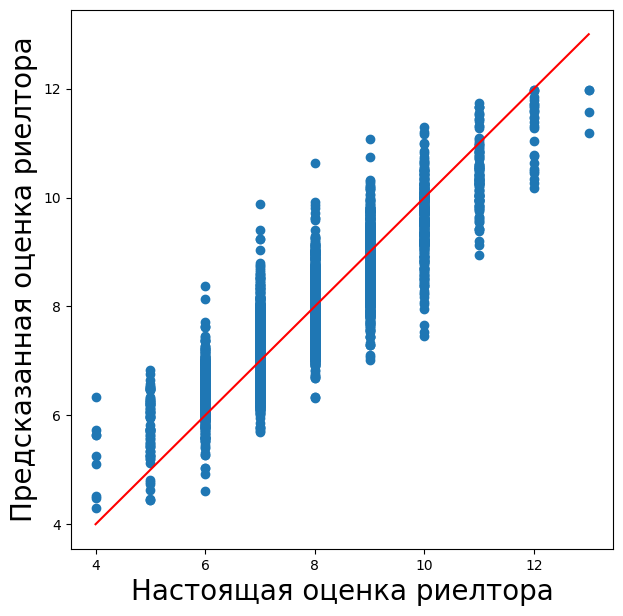

In [21]:
plt.figure(figsize=(7, 7))
plt.xlabel('Настоящая оценка риелтора', fontsize=20)
plt.ylabel('Предсказанная оценка риелтора', fontsize=20)
plt.scatter(test_target_variable, test_predictions_random_forest)
plt.plot([4, 13], [4, 13], 'r')